Use this notebook to create an overlay of average saliency maps for true positives and true negatives.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from PIL import Image

In [17]:
def min_nonzero(array):
    flattened_array = array.flatten()
    flattened_array = flattened_array[flattened_array > 0]
    return flattened_array.min()    

In [18]:
tn_map = np.load("../datasets/hsapseudo_tn_avg_map.npz")["arr_0"]
tn_map_list = tn_map.tolist()
max_tn_value = tn_map.max()
min_tn_nonzero_value = min_nonzero(tn_map)

tp_map = np.load("../datasets/hsapseudo_tp_avg_map.npz")["arr_0"]
tp_map_list = tp_map.tolist()
max_tp_value = tp_map.max()
# minimum nonzero value in average saliency map of true positives
min_tp_nonzero_value = min_nonzero(tp_map)

In [19]:
print(min_tn_nonzero_value)
print(min_tp_nonzero_value)


2.5720311754509078e-08
4.661479976578634e-06


## Preprocess average saliency maps
The grayscale values are scaled from their original scale to 0-255. Additionally, the grayscale average saliency maps of true negatives is converted to an RGB image whose pixels contain different red values. Similarly, the grayscale average saliency map of true positives is converted to an RGB image whose pixels contain different green values. 

In [20]:
def map_value_to_grayscale(value, min_value, max_value, min_color, max_color):
    scaled_value = (value - min_value) / (max_value - min_value)
    graycolor_scale = max_color - min_color
    graycolor = scaled_value * graycolor_scale + min_color
        
    return int(graycolor)

In [21]:
min_color = 0
max_color = 255

modified_tn_map_list = []
for row in tn_map_list:
    
    tmp_row = []
    for value in row:
        grayscale_value = map_value_to_grayscale(value, min_tn_nonzero_value, max_tn_value, min_color, max_color)
        rgb_value = [grayscale_value, 0, 0]
        tmp_row.append(rgb_value)
        
    modified_tn_map_list.append(tmp_row)
    
modified_tp_map_list = []
for row in tp_map_list:
    
    tmp_row = []
    for value in row:
        grayscale_value = map_value_to_grayscale(value, min_tp_nonzero_value, max_tp_value, min_color, max_color)
        rgb_value = [0, grayscale_value, 0]
        tmp_row.append(rgb_value)
        
    modified_tp_map_list.append(tmp_row)    


In [22]:
rgb_tn_map = np.asarray(modified_tn_map_list)
rgb_tp_map = np.asarray(modified_tp_map_list)

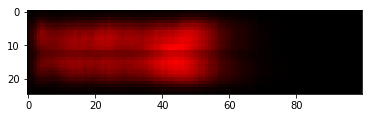

In [23]:
plt.imshow(rgb_tn_map)

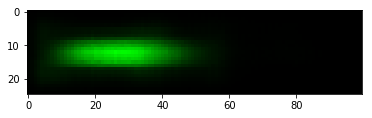

In [24]:
plt.imshow(rgb_tp_map)

## Create and display overlayed saliency map

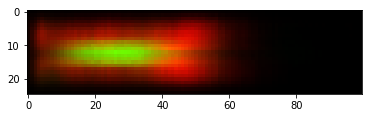

In [25]:
mixed_map = rgb_tn_map + rgb_tp_map
plt.imshow(mixed_map)

In [26]:
def save_color_image(image, output_filename):
    plt.figure(figsize=(10,3))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(output_filename, bbox_inches='tight', transparent=True, pad_inches=0)

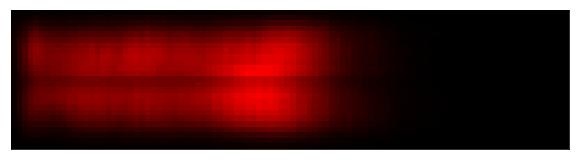

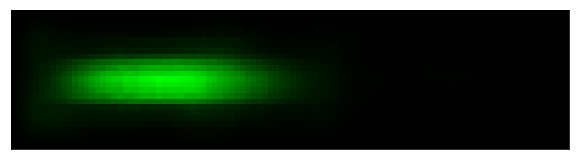

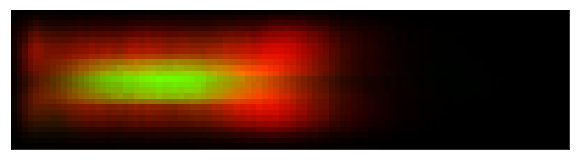

In [27]:
save_color_image(rgb_tn_map, "monochromatic_tn_map.png")
save_color_image(rgb_tp_map, "monochromatic_tp_map.png")
save_color_image(mixed_map, "mixed_saliency_map.png")